## Problem Statement

**Description**

**Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

**Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.

2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

**Data Dictionary**
The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

•	case_id: ID of each visa application

•	continent: Information of continent the employee

•	education_of_employee: Information of education of the employee

•	has_job_experience: Does the employee has any job experience? Y= Yes; N = No

•	requires_job_training: Does the employee require any job training? Y = Yes; N = No

•	no_of_employees: Number of employees in the employer's company

•	yr_of_estab: Year in which the employer's company was established

•	region_of_employment: Information of foreign worker's intended region of employment in the US.

•	prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.

•	unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.

•	full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position

•	case_status: Flag indicating if the Visa was certified or denied


# Importing the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# Loading the dataset

In [ ]:
# run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
visa = pd.read_csv("/content/drive/My Drive/Python Course/VisaAssist.csv")

# **Data Overview**

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## **Displaying the first few rows of the dataset**

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [ ]:
data.shape

(25480, 12)

## **Checking the data types of the columns for the dataset**

In [ ]:
# Check data types and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


We can see that there are total of 12 columns and 25480 rows in the dataset.

There is one column with float datatype, 2 columns with integer datatype and 9 columns with object types.

The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using isna() method.

In [ ]:
data.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


There are no missing values in the data.

## **Checking for duplicate values**

In [ ]:
# Check duplicate rows
data.duplicated().sum()

np.int64(0)

No duplicate rows in a DataFrame.

## **Checking for missing values**

In [ ]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

,0
case_id,0.000
continent,0.000
education_of_employee,0.000
has_job_experience,0.000
requires_job_training,0.000
no_of_employees,0.000
yr_of_estab,0.000
region_of_employment,0.000
prevailing_wage,0.000
unit_of_wage,0.000


There are no missing values

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.000,NaN,NaN,NaN,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,NaN,NaN,NaN,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.000,NaN,NaN,NaN,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


• The dataset has 25480 rows and 12 columns

• There are no missing values in the dataset

• There are no duplicate values in the dataset

• no_of_employees, yr_of_estab, and prevailing_wage are numeric features, while the rest are objects

• The no of employees has a mean of 5,667 and a median of 2,109. This indicates that the distribution is skewed

• There are negative values in the no of employees, which could be an error

• yr_of_estab ranges from 1800 to 2016

• prevailing_wage ranges from 2 to 319,210 and the distribution is skewed

• The most popular continent is Asia

• The most popular educational level is Bachelor


**1. Investigate the negative values in the number of employees**

In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

•	Since the number of employees in a company cannot be negative, we will consider it a data entry error.

•	We have 33 cases like this.

•	We will take the absolute value of those values.


In [ ]:
# convert the negative values to their absolute values
data['no_of_employees'] = abs(data['no_of_employees'])

**2. Visualizing the unique values in each categorical column to see if there are any strange values**

In [ ]:
# categorial columns
obj_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in obj_col:
    print(data[column].value_counts(True))
    print("-" * 50)

case_id
EZYV25480   0.000
EZYV01      0.000
EZYV02      0.000
EZYV03      0.000
EZYV04      0.000
             ... 
EZYV13      0.000
EZYV12      0.000
EZYV11      0.000
EZYV10      0.000
EZYV09      0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
region_of_employment
Northeast   0

•	Case ID can be removed as it is not needed

•	66% of the applications are from Asians

•	40% of the applicants have a bachelor's degree

•	58% of the applicants have job experience

•	88% of the applicants do not require job training

•	28% of the applicants have their worksite in the Northeast region of the US

•	90% of the applicants have a yearly unit of wage

•	89% of the visa applicants have full-time job positions

•	66% of the case statuses are certified

•	The target variable is imbalanced


In [ ]:
# Remove Case ID
data.drop(["case_id"], axis=1, inplace=True)

# **Exploratory Data Analysis (EDA) Summary**

The below functions need to be defined to carry out the EDA.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## **Univariate analysis**

**1. Observations on number of employees**

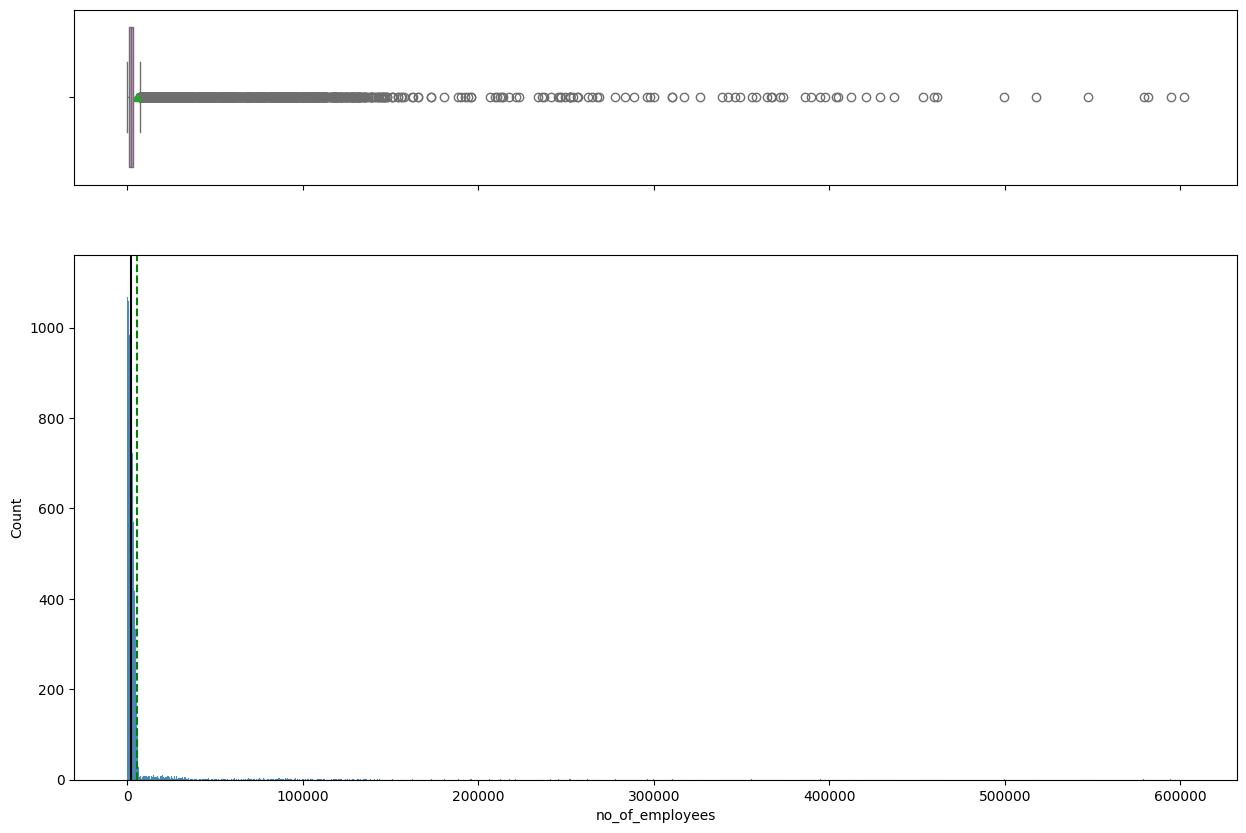

In [ ]:
histogram_boxplot(data,'no_of_employees')

•	The distribution of the number of employees is highly skewed to the right

•	It can be implied that the dataset has small companies, medium companies, and large international companies


**2. Observations on prevailing wage**

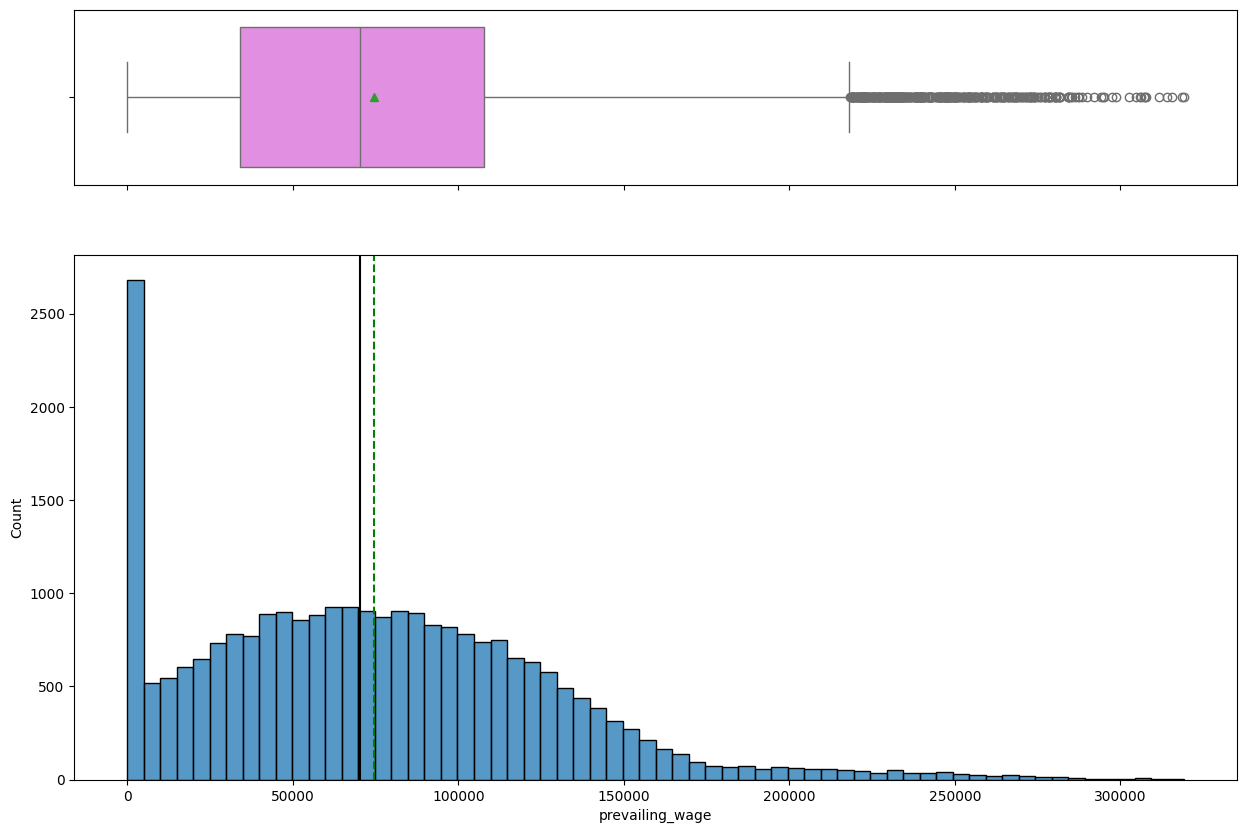

In [ ]:
histogram_boxplot(data,'prevailing_wage')

•	The distribution of the prevailing wage is skewed to the right

•	There is a huge difference between wages among applicants

•	There are applicants whose wages are more than 150,000

•	There are applicants whose wage is around 0, and there are a lot of them; we might need to check this

•	It could be that some wages are entered as hourly base while others as yearly base


In [ ]:
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

,count
unit_of_wage,
Hour,176


it looks like the small wages are actually hourly based

**3. Observations on continent**

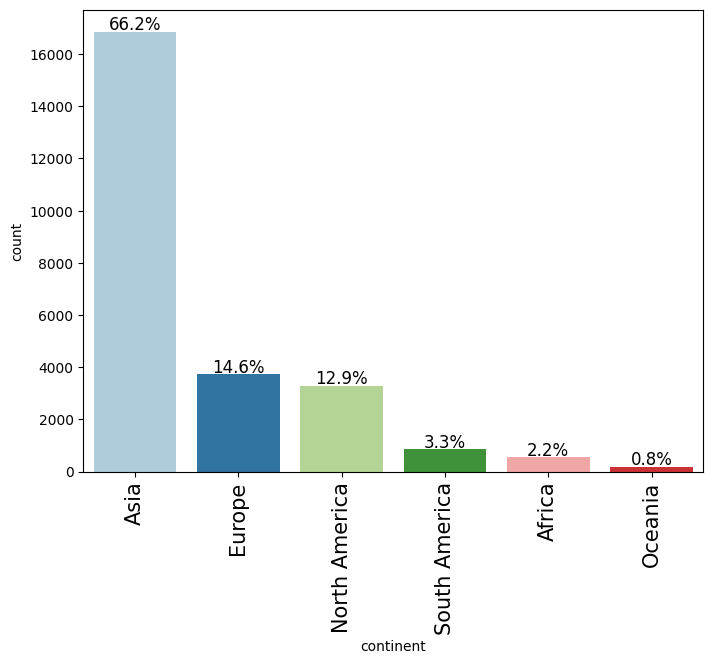

In [ ]:
labeled_barplot(data, "continent", perc=True)

66% are coming from Asia, 15% are coming from EU, and 13% are coming from North Amercia

**4. Observations on education of employee**

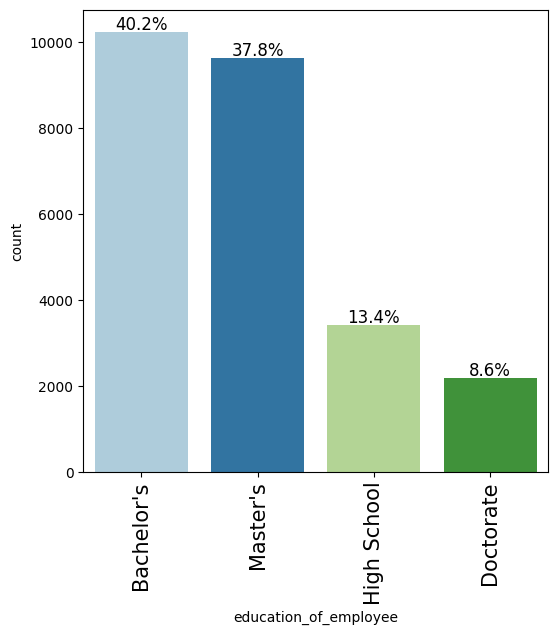

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

•	40.2% of the applicants have a bachelor's degree, followed by 37.8% having a master's degree.

•	8.6% of the applicants have a doctorate.


**5. Observations on job experience**

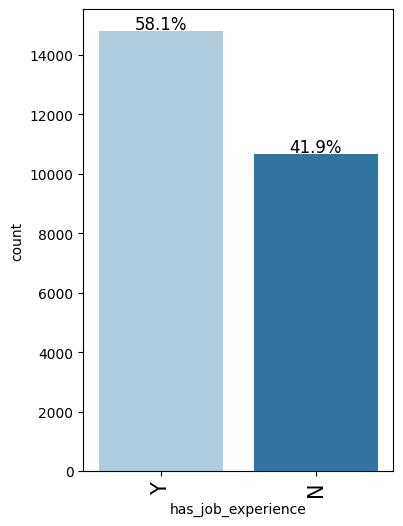

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)

58.1% of the applicants have job experience

**6. Observations on job training**

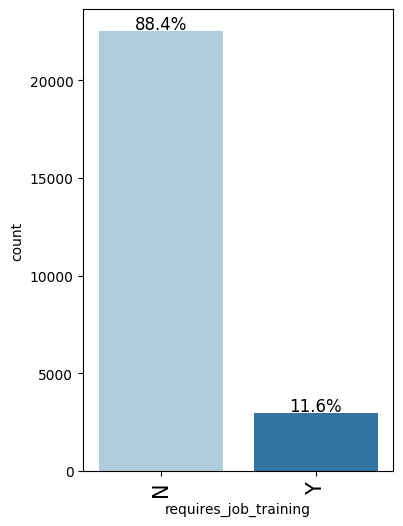

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)

88.4% of the applicants do not require any job training

**7. Observations on region of employment**

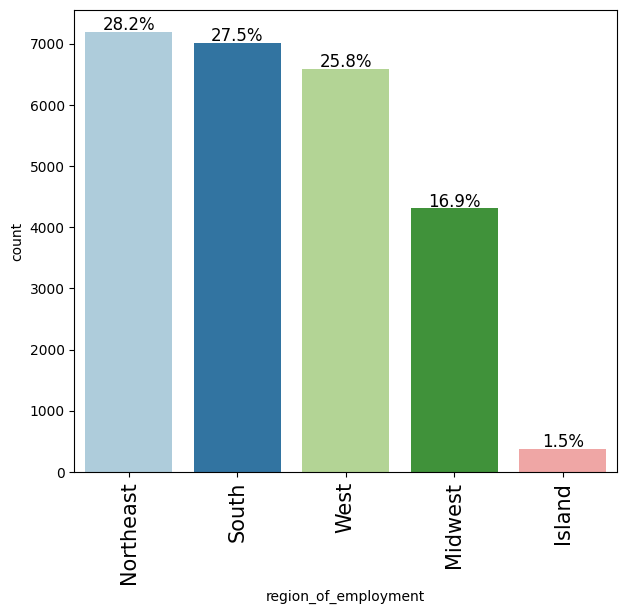

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)

•	Northeast, South, and West are almost equally distributed

•	The Island regions have only 1.5% of the applicants


**8. Observations on unit of wage**

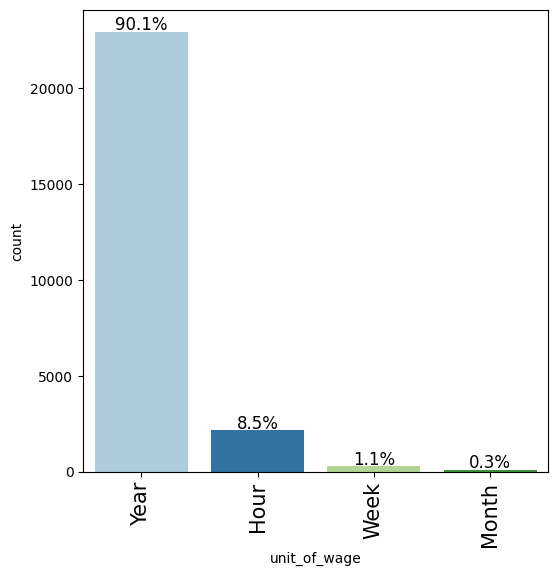

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)

90.1% of the applicants have a yearly unit of the wage

**9. Observations on case status**

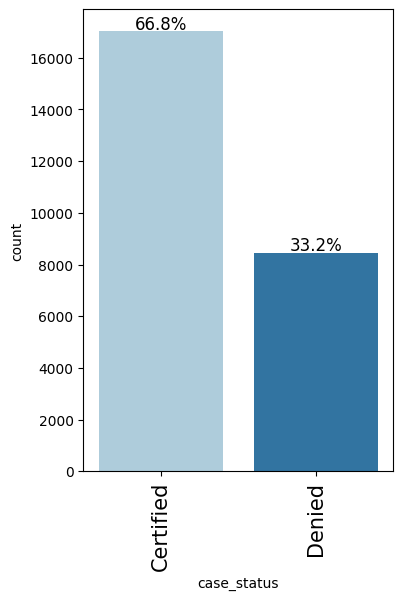

In [ ]:
labeled_barplot(data, "case_status", perc=True)

66.8% of the visas were certified.

## **Bivariate Analysis**

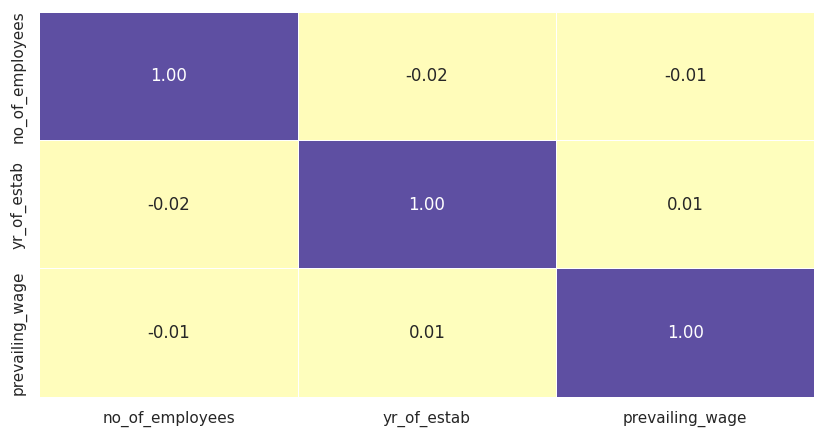

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(data.corr(numeric_only = True),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            fmt=".2f", cmap="Spectral")
plt.show()

we cannot see any correlation between the numerical variables

In [ ]:
# function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**1. Education vs case status**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


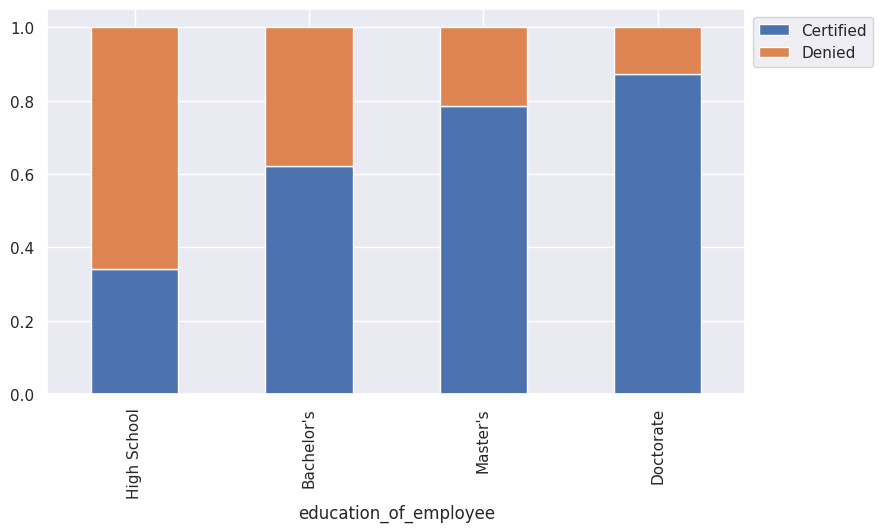

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

The higher the education, the more chance to get certified

**2. education vs region**

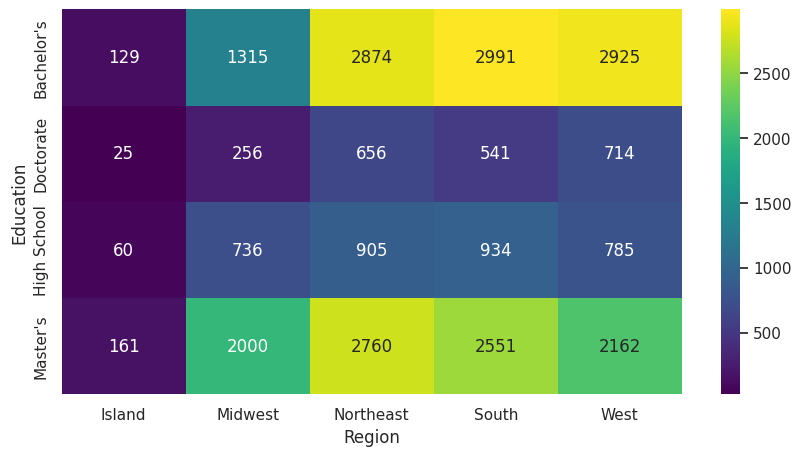

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(data["education_of_employee"], data["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

•	The requirement for the applicants who have passed high school is highest in the South region, followed by the Northeast region.

•	The requirement for a Bachelor's is mostly in the South region, followed by the West region.

•	The requirement for a Master's is mostly in the Northeast region, followed by the South region.

•	The requirement for a Doctorate is mostly in the West region, followed by the Northeast region.


**3. region vs case status**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


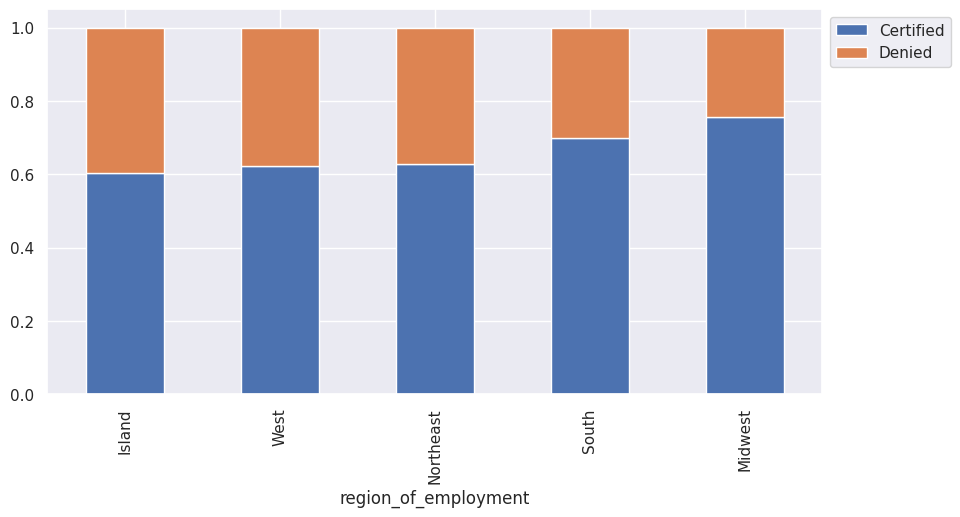

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status")

•	Midwest has the highest positive case chance

•	The island, on the opposite side, has the lowest positive case chance


**4. continent vs case status**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


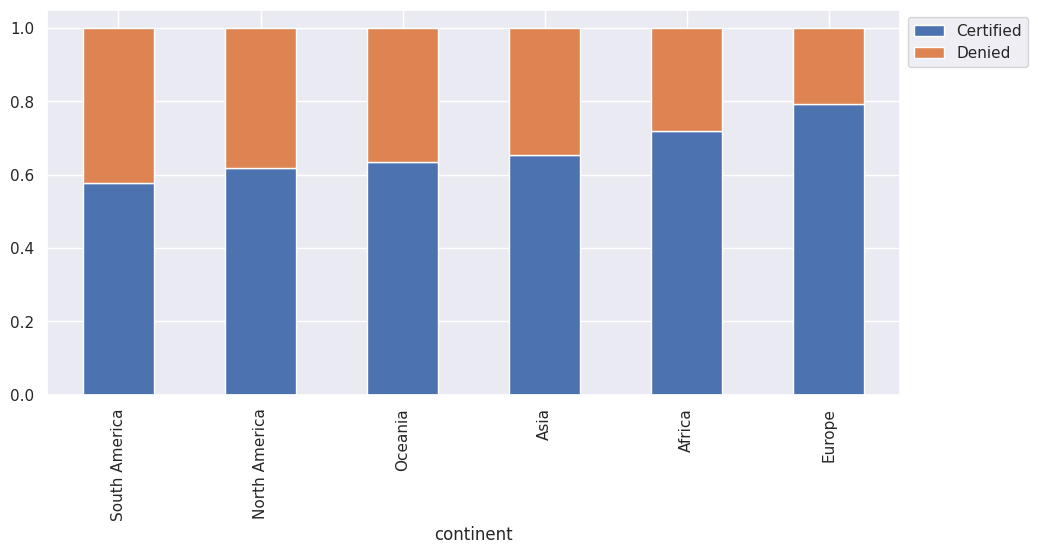

In [ ]:
stacked_barplot(data, "continent", "case_status")

EU has the highest chance of getting certified, while South America has the loest chance

**5. job experience vs case status**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


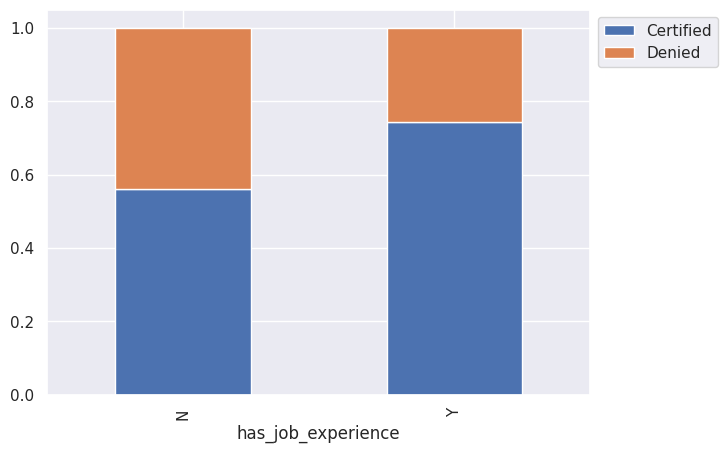

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")

Applicants with job experience have more chances of getting certified

**6. job experience vs training required**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


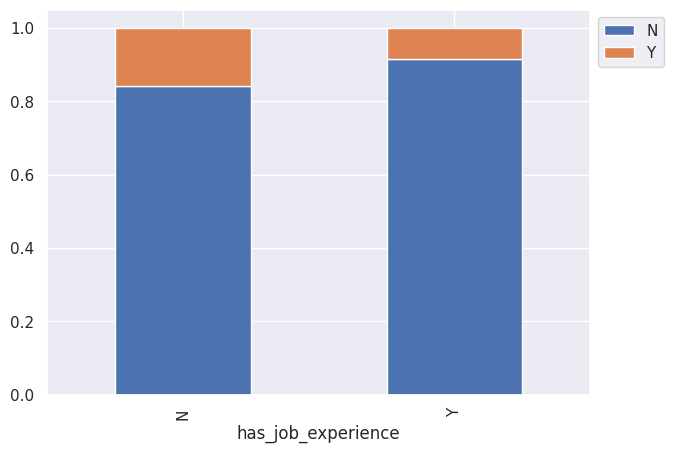

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training")

•	If the applicant has job experience, they are less likely to require training

**7. wage vs case status**

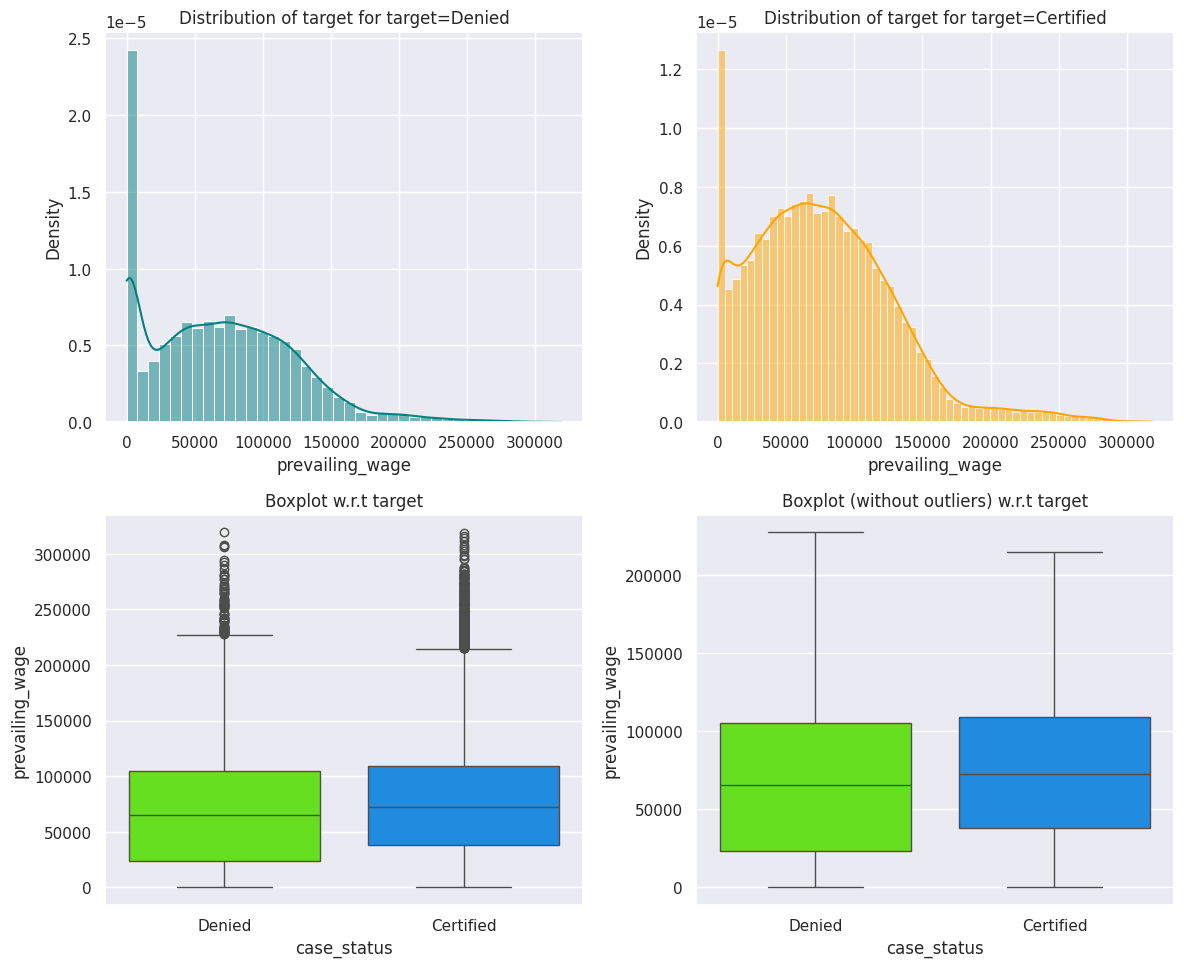

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

The median prevailing wage for the certified applications is slightly higher as compared to denied applications.

**8. region vs wage**

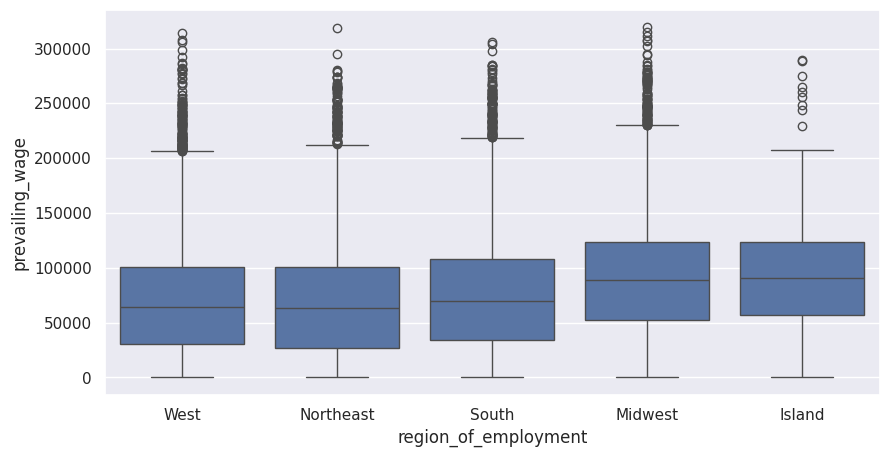

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage")
plt.show()

•	Prevailing wages are higher in the Midwest and on the Island

**9. unit of wage vs case status**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


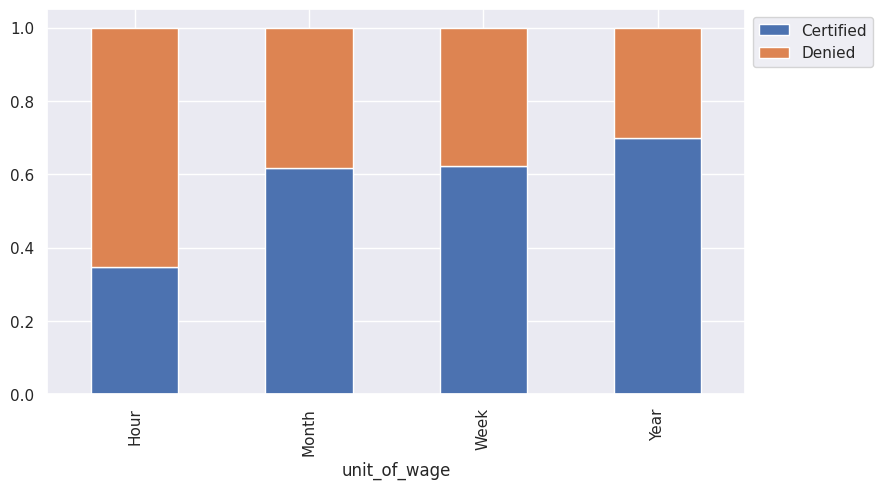

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

Hourly waged applicants are more likely to get denied while yearly are more likley to get certified

# **Data Preprocessing**

## **Feature Engineering**

**Outlier Check**

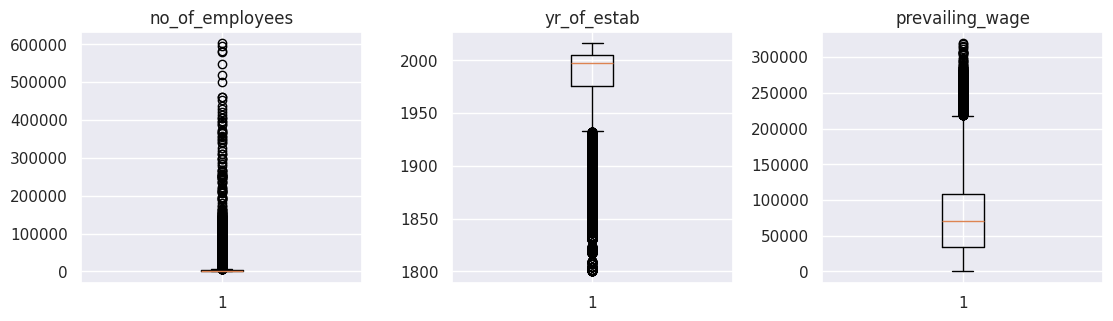

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are outliers, we will keep them as they have a valuable input

## **Data Preparation for modeling**

•	We want to predict which visa will be certified.

•	Before we proceed to build a model, we'll have to encode categorical features.

•	We'll split the data into train and test to be able to evaluate the model that we build on the train data.


In [ ]:
# encode case status, where certified is 1, denied is 0
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
# split to train and test
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


## **Creating Dummy Variables**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.astype(float)

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(float)

print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


# **Model Building**

## **Model evaluation criterion**

**Model can make wrong predictions as:**

1.	Model predicts that the visa application will get certified, but in reality, the visa application should get denied.

2.	Model predicts that the visa application will not get certified, but in reality, the visa application should get certified.

**Which case is more important?**

•	Both the cases are important as:

•	If a visa is certified when it had to be denied, a wrong employee will get the job position while US citizens will miss the opportunity to work in that position.

•	If a visa is denied when it had to be certified, the U.S. will lose a suitable human resource that can contribute to the economy.

**How to reduce the losses?**

•	F1 Score can be used as a metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

•	We will use balanced class weights so that the model focuses equally on both classes.


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Initial Model Building**

### **Model Building - Original Data**

In [ ]:
# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
# models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
# models.append(("GBM", GradientBoostingClassifier(random_state=1)))
# models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
# models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
# models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

# print("\nTraining Performance:\n")
# for name, model in models:
#     model.fit(X_train, y_train)
#     scores = recall_score(y_train, model.predict(X_train))
#     print("{}: {}".format(name, scores))

# print("\nValidation Performance:\n")
# for name, model in models:
#     model.fit(X_train, y_train)
#     scores_val = recall_score(y_val, model.predict(X_val))
#     print("{}: {}".format(name, scores_val))

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 77.70812928501469
Random forest: 84.31929480901077
GBM: 87.2771792360431
Adaboost: 88.86385896180215
dtree: 73.64348677766894
Xgboost: 85.36728697355534

Validation Performance:

Bagging: 0.7711515863689776
Random forest: 0.8284371327849589
GBM: 0.8733842538190364
Adaboost: 0.8807285546415982
dtree: 0.7405992949471211
Xgboost: 0.8528202115158637


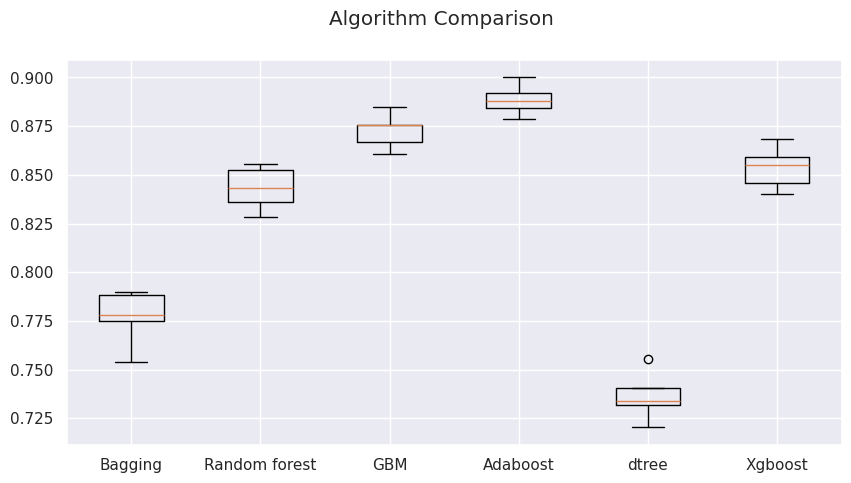

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9867, Validation Score: 0.7712, Difference: 0.2155
Random forest: Training Score: 1.0000, Validation Score: 0.8284, Difference: 0.1716
GBM: Training Score: 0.8789, Validation Score: 0.8734, Difference: 0.0056
Adaboost: Training Score: 0.8882, Validation Score: 0.8807, Difference: 0.0075
dtree: Training Score: 1.0000, Validation Score: 0.7406, Difference: 0.2594
Xgboost: Training Score: 0.9412, Validation Score: 0.8528, Difference: 0.0884


The boxplot shows that the Adaboost is giving the highest cross-validated recall followed by GBM

From the Training and Validation Performance Difference we can see that the performance of GBM is best followed by Adaboost

We will tune the best two models i.e. GBM and Adaboost and see if the performance improves

### **Model Building - Oversampled Data**

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9859941234084231
Random forest: 1.0
GBM: 0.8596474045053869
Adaboost: 0.8656219392752204
dtree: 1.0
Xgboost: 0.9307541625857003

Validation Performance:

Bagging: 0.7708578143360753
Random forest: 0.8299059929494712
GBM: 0.8507638072855465
Adaboost: 0.8622209165687427
dtree: 0.745005875440658
Xgboost: 0.8481198589894242


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9860, Validation Score: 0.7709, Difference: 0.2151
Random forest: Training Score: 1.0000, Validation Score: 0.8299, Difference: 0.1701
GBM: Training Score: 0.8596, Validation Score: 0.8508, Difference: 0.0089
Adaboost: Training Score: 0.8656, Validation Score: 0.8622, Difference: 0.0034
dtree: Training Score: 1.0000, Validation Score: 0.7450, Difference: 0.2550
Xgboost: Training Score: 0.9308, Validation Score: 0.8481, Difference: 0.0826


AdaBoost has the best performance on validation followed by GBM

### **Model Building - Undersampled Data**

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9686884600236314
Random forest: 1.0
GBM: 0.7479322567940134
Adaboost: 0.715833005120126
dtree: 1.0
Xgboost: 0.8796770382040173

Validation Performance:

Bagging: 0.6178025851938895
Random forest: 0.6745005875440658
GBM: 0.7291421856639247
Adaboost: 0.7159224441833137
dtree: 0.631316098707403
Xgboost: 0.686545240893067


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9687, Validation Score: 0.6178, Difference: 0.3509
Random forest: Training Score: 1.0000, Validation Score: 0.6745, Difference: 0.3255
GBM: Training Score: 0.7479, Validation Score: 0.7291, Difference: 0.0188
Adaboost: Training Score: 0.7158, Validation Score: 0.7159, Difference: -0.0001
dtree: Training Score: 1.0000, Validation Score: 0.6313, Difference: 0.3687
Xgboost: Training Score: 0.8797, Validation Score: 0.6865, Difference: 0.1931


GBM has the best performance followed by AdaBoost model as per the validation performance

**Observations**

After building 15 models, observations are as follows-

•	For Original Data, GBM has the best performance followed by the AdaBoost model as per the validation performance

•	For Oversampled Data, AdaBoost has the best performance on validation followed by GBM

•	For Undersampled Data, GBM has the best performance followed by the AdaBoost model as per the validation performance

•	Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance

•	We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before


## **Hyperparameter Tuning**

### **Tuning AdaBoostClassifier model with Oversampled data**

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_over, y_train_over)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_over, y_train_over)
adb_train

In [ ]:
confusion_matrix_sklearn(tuned_adb, X_train_over, y_train_over)

In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

In [ ]:
confusion_matrix_sklearn(tuned_adb, X_val, y_val)

### **Tuning Gradient Boosting model with Undersampled Data**

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

In [ ]:
confusion_matrix_sklearn(tuned_gbm1, X_train_un, y_train_un)

In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

In [ ]:
confusion_matrix_sklearn(tuned_gbm1, X_val, y_val)

### **Tuning Gradient Boosting model with Oversampled data**

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm2, X_train_over, y_train_over)
gbm2_train

In [ ]:
confusion_matrix_sklearn(tuned_gbm2, X_train_over, y_train_over)

In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

In [ ]:
confusion_matrix_sklearn(tuned_gbm2, X_val, y_val)

## **Model Comparison and Final Model Selection**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

**Observations:**

•	GBM (Oversampled) has the highest training accuracy (0.815) & F1 Score (0.824).

•	GBM (Oversampled) has the highest recall (0.865), meaning it captures more positive cases.

•	AdaBoost lags behind in all metrics.


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,
        adb_val.T
        ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Oversampled data",
]
print("Validation performance comparison:")
models_train_comp_df

**Observations:**

•	GBM (Oversampled) has the highest Validation Accuracy (0.739).

•	GBM (Oversampled) has the best F1 Score (0.814), meaning it balances precision & recall well.

•	GBM (Oversampled) has the highest Recall (0.852), meaning it detects more positive cases correctly.

•	AdaBoost is the weakest performer overall.



**Best Performing Model: GBM (Oversampled)**

Best Validation Accuracy (0.739)

Best F1 Score (0.814)

Highest Recall (0.852) → Best for detecting positive cases

Better balance between training & validation performance (no major overfitting)

Final Decision: Use Gradient Boosting with Oversampling!




### **Performance on Test Set**

In [ ]:
# Let's check the performance on test set
gbm1_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm1_test

The GBM model trained on oversampled data has given ~84% recall on the test set

This performance is in line with what we achieved with this model on the train and validation sets

So, this is a generalized model

### **Feature Importance**

In [ ]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

the top three important features to look for while certifying a visa are -

Education of the employee (High School),

Job experience,

and Education of the employee (Masters).

# Business Insights and Recommendations

**The profile of the applicants for whom the visa status can be approved:**

**The best-fit profile is:**

•	Education level - (Higher education the better) At least has a Bachelor's degree - Master's and doctorate are preferred

•	Job Experience - Should have some job experience.


**Secondary information to look at:**

• Unit of Wage - Applicants have a yearly unit of wage.

• Continent - Applicants from Europe, Africa, and Asia have higher chances of visa certification.

• Region of employment - Our analysis suggests that job applicants in the Midwest region have a higher chance of getting visa approval.

The approvals can also be made based on the requirement of talent, from our analysis we see that:

• The requirement for the applicants who have passed high school is most in the South region, followed by the Northeast region.

• The requirement for a Bachelor's is mostly in the South region, followed by the West region.

• The requirement for a Master's is most in the Northeast region, followed by the South region.

• The requirement for a Doctorate is mostly in the West region, followed by the Northeast region.




**The profile of the applicants for whom the visa status can be denied:**

**Primary information to look at:**

•	Education level - Doesn't have any degree and has completed high school.

•	Job Experience - Doesn't have any job experience.

•	Prevailing wage - The median prevailing wage of the employees for whom the visa got certified is around 65k.


**Secondary information to look at:**

•	Unit of Wage - Applicants have an hourly unit of wage.

•	Continent - Ideally the nationality and ethnicity of an applicant shouldn't matter to work in a country but previously it has been observed that applicants from South America, North America, and Oceania have higher chances of visa applications getting denied.


**Additional information on employers and employees can be collected to gain better insights. Information such as:**

•	Employers: Information about the wage they are offering to the applicant, the Sector in which the company operates, etc.

•	Employees: Specialization in their educational degree, Number of years of experience, etc.


